In [1]:
from andromeda.util.common import read_pickle, write_pickle
import pandas as pd
import numpy as np

## Build KMean Cluster

In [2]:
output_name = '15_new02'
num_clusters = 15
random_state = 1234
runs = 20

In [3]:
res003 = pd.read_pickle('/Users/aphri/pycharm/data/wv_ticker_mapped_cleaned_new.pkl')
res003.head()

,s,vo,wv,ticker
date,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",[CNC]
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",[NFLX]
2020-11-10 06:07:36,las agencias de turismo se deben reinventar lu...,lets worldwide travel colombia por design,"[0.19914782, 0.078872666, 0.17587417, -0.07582...","[ALK, LVS]"
2019-10-24 23:13:31,oracle blockchain,provide single source of truth for hyperledger...,"[-0.074229, -0.017419994, -0.079432994, -0.071...",[ORCL]
2013-12-02 00:58:41,amazon best selling author callan rush worksho...,fill events,"[-0.17017, 0.029013999, 0.1578735, -0.16875601...",[AMZN]


- each word vector is 300-dimensional from glove.42B.300d

In [8]:
from andromeda.nlp.processor import WordVector
wv = WordVector()
wv_model = wv.processor

C:\Users\aphri\miniconda3\envs\pycharm\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


- create wv matrix to do clustering with

In [5]:
wv_matrix=np.array([list(value) for value in res003['wv'].values])

- create kmean cluster and save trained model

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters, random_state=random_state, n_init=runs)
km.fit(wv_matrix)

In [4]:
#write_pickle(km, f'km_wv_{output_name}.pkl')
km = read_pickle(f'km_wv_{output_name}.pkl')

In [5]:
clusters = km.labels_.tolist()
res003['cluster'] = clusters
res003.head()

,s,vo,wv,ticker,cluster
date,,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",[CNC],10
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",[NFLX],1
2020-11-10 06:07:36,las agencias de turismo se deben reinventar lu...,lets worldwide travel colombia por design,"[0.19914782, 0.078872666, 0.17587417, -0.07582...","[ALK, LVS]",1
2019-10-24 23:13:31,oracle blockchain,provide single source of truth for hyperledger...,"[-0.074229, -0.017419994, -0.079432994, -0.071...",[ORCL],11
2013-12-02 00:58:41,amazon best selling author callan rush worksho...,fill events,"[-0.17017, 0.029013999, 0.1578735, -0.16875601...",[AMZN],1


In [9]:
for i in range(len(km.cluster_centers_)):
    print(f"Cluster {i}")
    words = [t[0] for t in wv_model.similar_by_vector(km.cluster_centers_[i])]
    print(words)

Cluster 0
['where', 'the', 'city', 'one', 'new', 'will', 'that', 'which', 'area', 'well']
Cluster 1
['one', 'will', 'it', 'make', 'that', 'well', 'even', 'we', 'up', 'but']
Cluster 2
['million', 'billion', 'year', 'than', 'percent', 'dollars', 'month', 'expected', 'over', 'increase']
Cluster 3
['company', 'acquisition', 'inc.', 'acquires', 'acquire', 'corporation', 'investment', 'management', 'acquired', 'completes']
Cluster 4
['which', 'that', 'will', 'one', 'it', 'the', 'its', 'also', 'well', 'both']
Cluster 5
['that', 'provide', 'will', 'which', 'however', 'should', 'both', 'well', 'need', 'because']
Cluster 6
['dividend', 'earnings', 'dividends', 'quarterly', 'income', 'shares', 'profit', 'revenue', 'quarter', 'equity']
Cluster 7
['announces', 'announced', 'announce', 'launches', 'its', 'plans', 'company', 'announcement', 'announcing', 'launch']
Cluster 8
['quarter', 'fourth', 'third', 'last', 'year', 'first', 'second', 'expected', 'announced', 'next']
Cluster 9
['award', 'one', 'y

In [10]:
cluster_name = {
    3: 'acquisition',
    12: 'management',
}

In [11]:
res003['factor'] = res003['cluster'].map(cluster_name)

In [24]:
res003.head(10)

,s,vo,wv,ticker,cluster,factor
date,,,,,,
2018-07-03 18:16:26,centene corporation,reports quarter earnings of per share,"[0.069821596, 0.2268446, -0.1357558, -0.047921...",[CNC],10,NaN
2014-01-30 13:09:06,nfl,encourage fans shopping to purchase from nfl t...,"[0.07208228, -0.0021257144, 0.2515124, -0.1012...",[NFLX],1,NaN
2020-11-10 06:07:36,las agencias de turismo se deben reinventar lu...,lets worldwide travel colombia por design,"[0.19914782, 0.078872666, 0.17587417, -0.07582...","[ALK, LVS]",1,NaN
2019-10-24 23:13:31,oracle blockchain,provide single source of truth for hyperledger...,"[-0.074229, -0.017419994, -0.079432994, -0.071...",[ORCL],11,NaN
2013-12-02 00:58:41,amazon best selling author callan rush worksho...,fill events,"[-0.17017, 0.029013999, 0.1578735, -0.16875601...",[AMZN],1,NaN
2017-04-27 02:33:14,ford dealership,launches new customer centric website,"[0.1994492, 0.15412581, 0.083172, -0.054721855...",[F],11,NaN
2012-08-05 00:28:55,walmart foundation grant,will fund major expansion of iahs school based...,"[0.318751, -0.0037452132, 0.23741141, 0.009615...",[WMT],5,NaN
2011-05-12 05:50:15,las vegas men,indicted for falsifying vehicle emissions tests,"[-0.208576, 0.099367, -0.40806097, 0.066902995...","[ALK, LVS]",4,NaN
2016-08-19 22:59:12,att donation aids louisianans,impacted by floods,"[-0.005674988, -0.042664997, 0.37695, -0.37834...",[T],5,NaN


In [28]:
temp1 = res003[res003.cluster == 12]
temp2 = temp1['s'] + ' ' + temp1['vo']

In [30]:
temp2.head(10)

date
2010-02-08 18:17:08    year cisco corporate development integration v...
2010-05-07 14:26:26         ford fiesta celebrate with abcs jimmy kimmel
2012-08-24 23:17:45    mma world champion announces georges st pierre...
2010-11-06 12:49:48    m castle co announces appointment to board of ...
2014-10-04 22:56:02                             m castle co appoints cfo
2018-10-24 17:50:28    o smith corporation unveils its lloyd r smith ...
2015-03-17 18:05:26    dollar morgan stanley team joins steward partners
2019-10-30 01:44:29          texas leaders join texas board of directors
2018-07-03 07:54:38                          cma awards carrie underwood
2015-04-20 10:28:31                cma awards hosted by carrie underwood
dtype: object

## Create factors from Cluster

In [13]:
from andromeda.finance.analytics.portfolio import factors_from_cluster
res004 = factors_from_cluster(res003)

In [14]:
res004

factor             acquisition  management
date       ticker                         
2009-09-29 ABT             1.0         NaN
2009-10-02 BLL             1.0         NaN
           F               NaN         1.0
2009-10-03 AJG             1.0         NaN
2009-10-04 IBM             1.0         NaN
...                        ...         ...
2021-01-09 DISCK           NaN         1.0
2021-01-10 AJG             1.0         NaN
2021-01-11 CVS             NaN         1.0
2021-01-12 AJG             2.0         NaN
           F               NaN         1.0

[5910 rows x 2 columns]

In [15]:
#res004.to_pickle(f'factors_res_{output_name}.pkl')
res004 = pd.read_pickle(f'factors_res_{output_name}.pkl')

## Stats for Factors

In [16]:
res004.head()

factor             acquisition  management
date       ticker                         
2009-09-29 ABT             1.0         NaN
2009-10-02 BLL             1.0         NaN
           F               NaN         1.0
2009-10-03 AJG             1.0         NaN
2009-10-04 IBM             1.0         NaN

In [17]:
res004.columns

Index(['acquisition', 'management'], dtype='object', name='factor')

count stat for acquisition:
  sum 2855
  mean 1.1226897365316555
  median 1.0
count stat for management:
  sum 3084
  mean 1.2127408572552103
  median 1.0


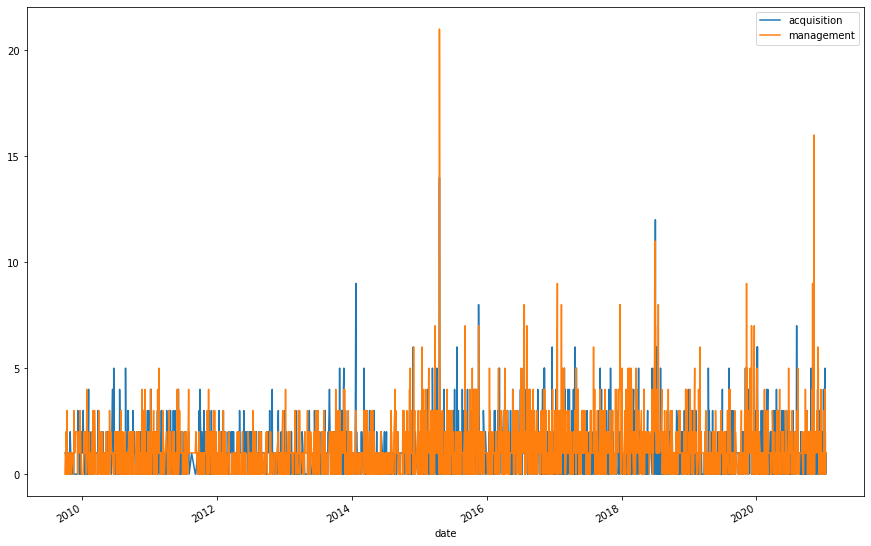

In [18]:
for col in res004.columns:
    counts = res004[col].groupby('date').count()
    print(f"count stat for {col}:")
    print(f"  sum {counts.sum()}")
    print(f"  mean {counts.mean()}")
    print(f"  median {counts.median()}")
    counts.plot(legend=True, figsize=(15, 10))

## Load SP 500 Returns and GICS

In [19]:
returns = pd.read_pickle('sp500_daily_returns.pkl')

In [20]:
sp500_gics = pd.read_pickle('sp500_gics.pkl')

## Performance Analysis

In [21]:
import andromeda.finance.analytics.performance as perf

ANALYZING: acquisition
                Sharpe  Volatility
roll-None    -0.293518    0.186534
roll-2       -0.192588    0.196313
roll-100     -0.082733    0.174862
equal weight  0.000000    0.178043
roll-5        0.007181    0.198166
roll-13       0.022138    0.188064
roll-8        0.035260    0.193428
roll-15       0.047518    0.183182
roll-10       0.048062    0.189920
sector neutral:
                Sharpe  Volatility
roll-None    -0.208230    0.186752
roll-2       -0.110041    0.198925
roll-100     -0.015749    0.174678
equal weight  0.000000    0.174855
roll-5        0.103856    0.202671
roll-15       0.131117    0.186481
roll-13       0.143285    0.190986
roll-10       0.158944    0.192534
roll-8        0.199997    0.195842
ANALYZING: management
                Sharpe  Volatility
roll-5       -0.193638    0.219108
roll-2       -0.170801    0.231681
equal weight  0.000000    0.177946
roll-8        0.020933    0.211205
roll-None     0.041341    0.211422
roll-15       0.047064    0.1

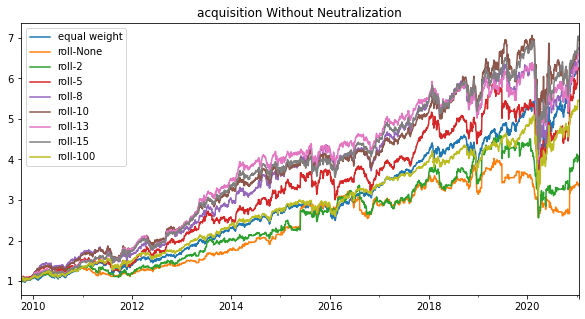

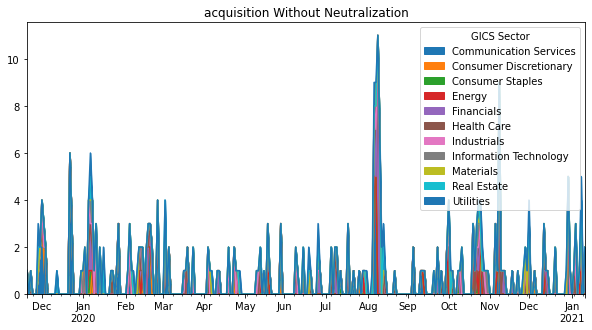

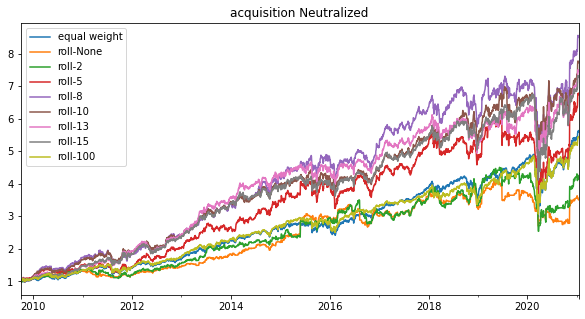

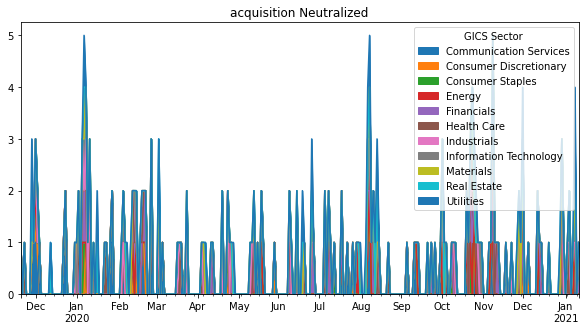

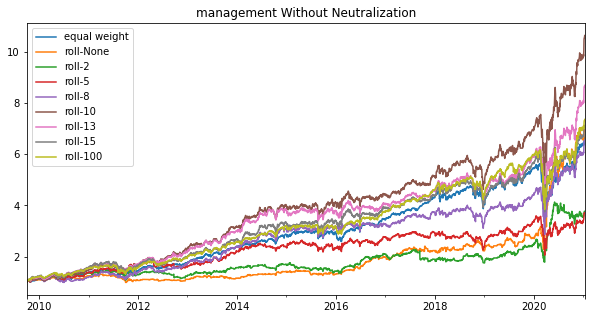

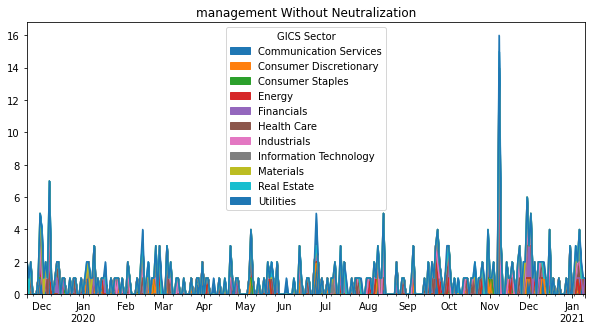

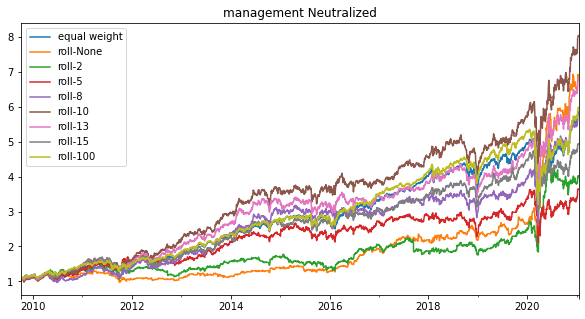

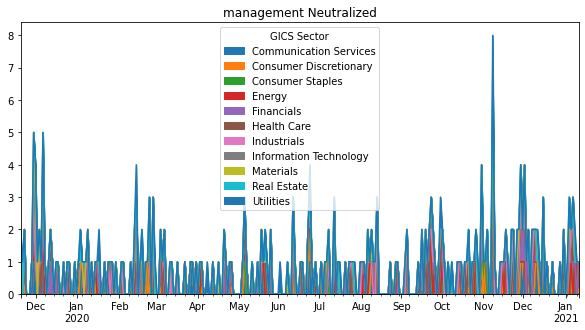

In [22]:
for k, v in cluster_name.items():
    perf.analyze_factor(v, res004, returns, sp500_gics)

In [ ]:
# two issues in performance analysis:
# 1. didn't enforce date index continuity
# 2. didn't enforce universe shape
# fixed